# <span style = "color:#b31105;font-family:helvetica">Unsupervised Learning

## <span style = "color:#b31105;font-family:helvetica">K-means Clustering

### <span style = "color:#b31105;font-family:helvetica"> Introduction to K-means clustering 

### <span style = "color:#b31105;font-family:helvetica"> Topics Covered:
* Understanding Clustering
* History and Intuition of K-Means
* Mathematical Theory of K-Means
* Example of K-Means

#### <span style = "color:#b31105;font-family:helvetica"> K-Means is very simple intuitaive way of cluastering unlabeled data

### <span style = "color:#b31105;font-family:helvetica"> Note: We use elbow method in K-means and KNN but point to remeber they totally different algorithm and solve differnt problems

## <span style = "color:#b31105;font-family:helvetica"> Clustering Overview - General Concepts

### <span style = "color:#b31105;font-family:helvetica"> Clustering uses unlabeled data and looks for similarities between groups(clusters) in order to attempt to segment the data into sepereate clusters</span>

#### <span style = "color:#b31105;font-family:helvetica"> But always keep in mind we don't know the true correct label for this data.

### <span style = "color:#b31105;font-family:helvetica"> Clustering doesn't "label" the data, although it will create groups. Now its a job of Data scientist or ML practicioner has to dive deep in to the data and see if we can figure out what the reasonalble label is for these particular groups or labels.

## <span style = "color:#b31105;font-family:helvetica"> Main Clustering Ideas:
* Use features to decide which points are most similar to other points.
* Realize that there is no final correct "y" label to complare cluster results to.
* We can think of clustering as an unsupervised learning process gthat "discovers" potential labels.

### <span style = "color:#b31105;font-family:helvetica">Some question we will try to answer
* How do we decide which number of clusters is best?
* Do we decide or let the algorithm decide?
* How can we measure "goodness of fit" for clustering without a y label for comparison?

### <span style = "color:#b31105;font-family:helvetica"> Also keep in mind that it's much harder to compare unsupervised algorithms against each other due to lack of ground truth based performance metrics.

# <span style = "color:#b31105;font-family:helvetica"> K- Means Clustering -Theory

### <span style = "color:#b31105;font-family:helvetica"> IN 1967: James Macqueen of UCLA develops and publishes" Some methods for classification and analysis of multivariate observations ". - This is the first publication to introduce the term"K-Means" as a sequential clustering algorithm

### <span style = "color:#b31105;font-family:helvetica"> Let's Walk though an example of clustering unlabeled data.

### <span style = "color:#b31105;font-family:helvetica"> At the end of clustering we must satify following set of properties for each point is following:
* Each point must belog to a cluster
* Each point can only belong to one cluster (no single point can belong to multiple clusters).

## <span style = "color:#b31105;font-family:helvetica"> Step 1:
* We start with unlabeled data(only features). Choose the number of clusters to create (this is the K value)

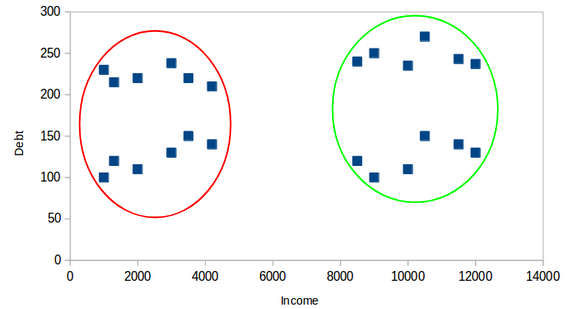

#### <span style = "color:#b31105;font-family:helvetica"> This is something you should decide for before starting the algorithm

### <span style = "color:#b31105;font-family:helvetica">Step 2: 
* Randomly select K distinct data</span>

#### <span style = "color:#b31105;font-family:helvetica"> We will treat new k points as our "cluster" points

### <span style = "color:#b31105;font-family:helvetica"> Step 3:
* Assign each remaining point to the nearest "Cluster" Point. Based on the distance we are measuring distance to the nearest randomly chosen data cluster point.

### <span style = "color:#b31105;font-family:helvetica"> Step 4:
* Calculate the centre of the cluster points based mean value of each point vector.

### <span style = "color:#b31105;font-family:helvetica"> Step 5:
Now assign each point to the nearesr cluster center

#### <span style = "color:#b31105;font-family:helvetica"> Now we will iterate through each point and check which cluster centre the particular point is nearest to.So we completed iteration on data points we will end up reassiging the points to a different cluster centre.

### <span style = "color:#b31105;font-family:helvetica"> And we will repeat steps 4 and 5 until there are no more cluster reassignments.

## <span style = "color:#b31105;font-family:helvetica"> If there are no more reassignemnts, we are done!, The clusters have been found.

#### <span style = "color:#b31105;font-family:helvetica">We will being with Coding Out an example of K-means clustering , then we'll revist these consideration when they naturally appaear after we find set of clusters for a given K.

# <span style = "color:#b31105;font-family:helvetica"> K- Means Clustering - Practical coding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("bank-full.csv")

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### <span style = "color:#b31105;font-family:helvetica"> When it comes to clustering either you should have domain knowledge or you need someone with domain knowledge

<AxesSubplot:xlabel='age', ylabel='Count'>

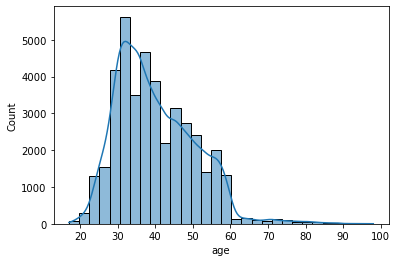

In [6]:
sns.histplot(data = df, x = 'age', bins= 30, kde = True)

<AxesSubplot:xlabel='age', ylabel='Count'>

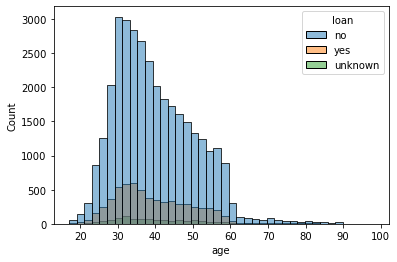

In [7]:
sns.histplot(data = df, x = 'age', bins= 40, hue = "loan")

<AxesSubplot:xlabel='pdays', ylabel='Count'>

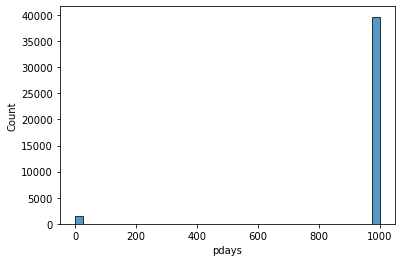

In [8]:
sns.histplot(data = df, x = 'pdays', bins= 40,)

<AxesSubplot:xlabel='pdays', ylabel='Count'>

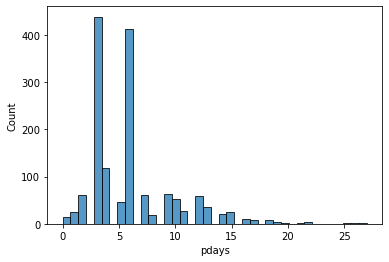

In [9]:
sns.histplot(data = df[df["pdays"]!=999], x = 'pdays', )


In [10]:
df["contact"].unique()

array(['telephone', 'cellular'], dtype=object)

In [11]:
df["duration"]

0        261
1        149
2        226
3        151
4        307
        ... 
41183    334
41184    383
41185    189
41186    442
41187    239
Name: duration, Length: 41188, dtype: int64

<AxesSubplot:xlabel='duration', ylabel='Count'>

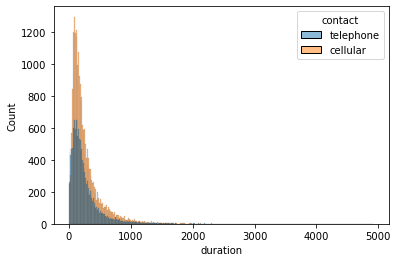

In [12]:
sns.histplot(data = df, x = 'duration', hue = "contact")

<AxesSubplot:xlabel='contact', ylabel='count'>

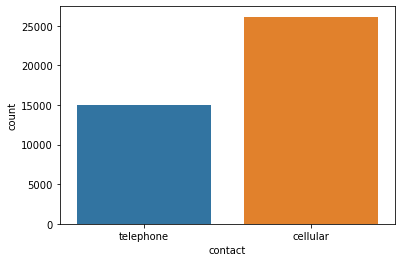

In [13]:
sns.countplot(data = df, x = "contact")

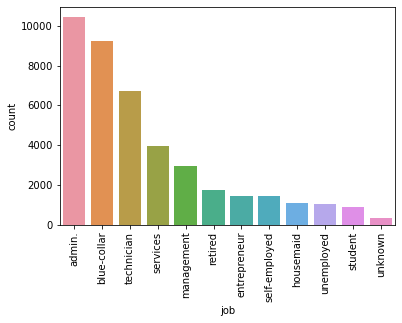

In [14]:
sns.countplot(data = df, x = "job", order= df["job"].value_counts().index)
plt.xticks(rotation = 90);

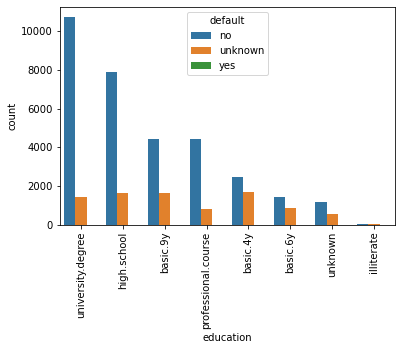

In [15]:
sns.countplot(data = df, x = "education", order= df["education"].value_counts().index, hue = "default")
plt.xticks(rotation = 90);

<AxesSubplot:xlabel='default', ylabel='count'>

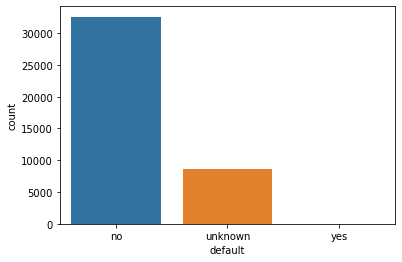

In [16]:
sns.countplot(data = df, x = "default")

In [17]:
df["default"].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [18]:
df["loan"].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

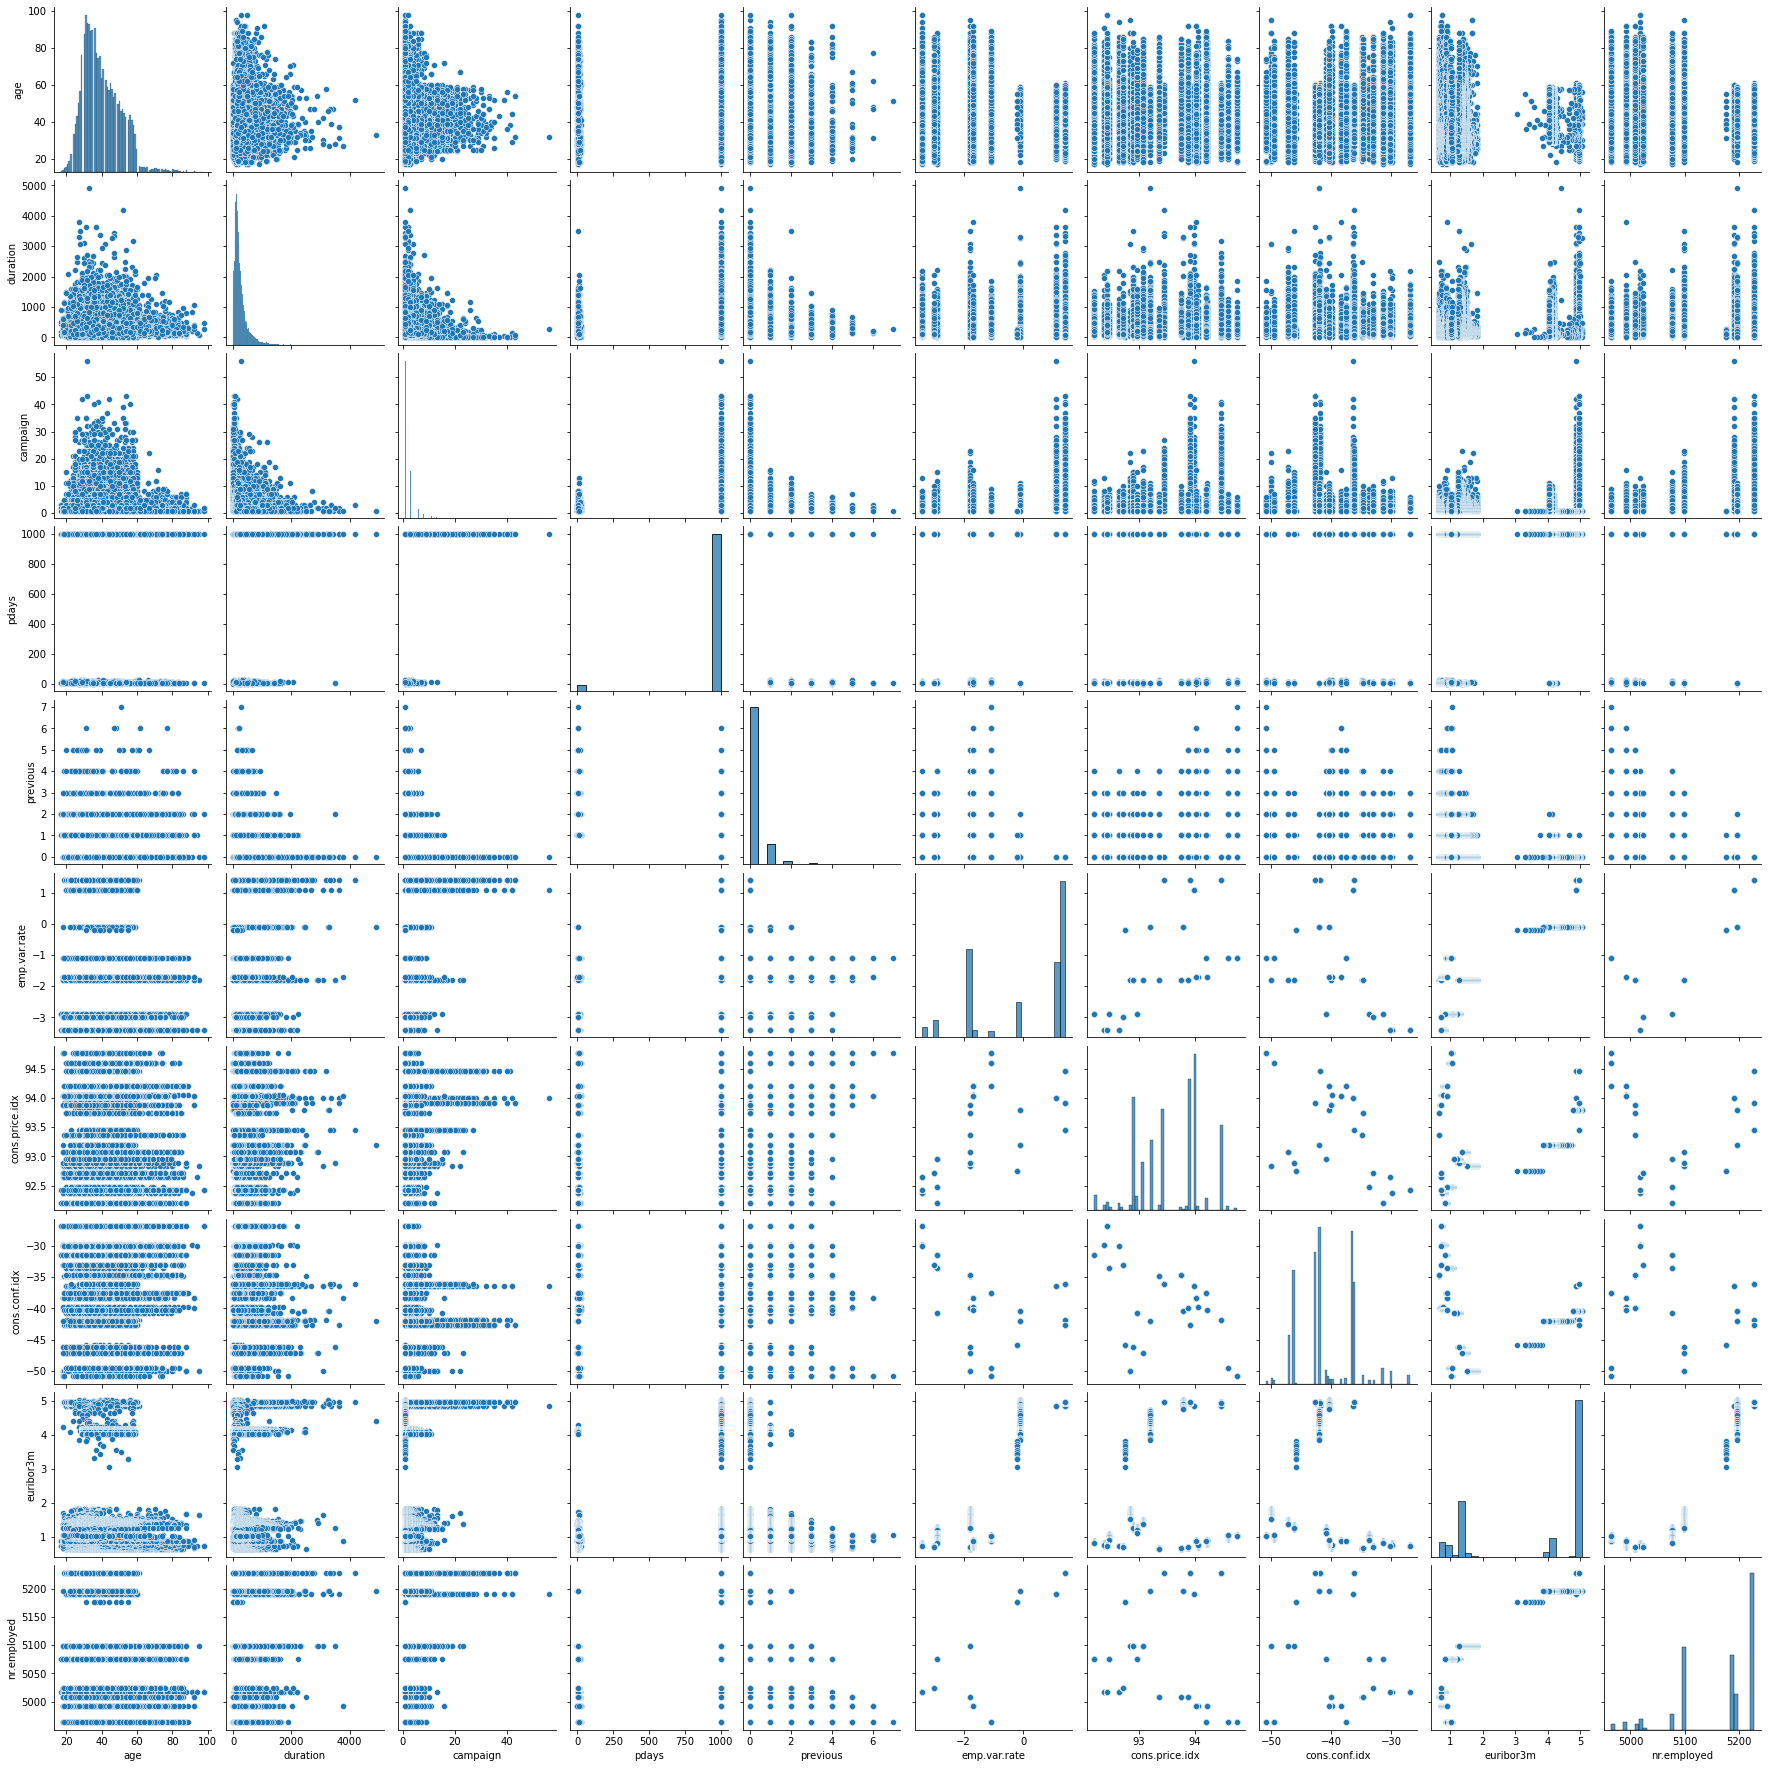

In [19]:
sns.pairplot(df)

#  <span style = "color:#b31105;font-family:helvetica"> K-Means Clustering Coding example Data Preperation and Model fitting

In [20]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## <span style = "color:#b31105;font-family:helvetica">We have most of data as categorical data and when it comes to K-Means clustering intuitively we know we can't really use this categorical data, becasue everything is going to be based of the distance metrics

### <span style = "color:#b31105;font-family:helvetica"> We are going to make dummy variable and we don't need to drop first to handle issues of dummy variable trap and multicollinearty because this is a unsupervised learning which means we will not get some sort of coefficients attached to these dummy varibales

In [21]:
X = pd.get_dummies(df)

In [22]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1


### <span style = "color:#b31105;font-family:helvetica"> We have to scale the data because the data is from different scales.

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
scaled_X = scaler.fit_transform(X)

In [26]:
from sklearn.cluster import KMeans

#### <span style = "color:#b31105;font-family:helvetica">class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator) KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')

### <span style = "color:#b31105;font-family:helvetica"> The absolute important parameter is number of K the defualt is 8, but value provided default is meaning less as eventually we have to idendify the K value

### <span style = "color:#b31105;font-family:helvetica"> Also, there is a parameter random, and if we recall things are chosen randomly at the start. 

In [27]:
model = KMeans(n_clusters= 2) # right now 2 is chosen and it really depends in the data set where you want to start form
# like in this case the data for marketing and 2 is chosen based on to whome we want to do marketing or not

In [28]:
cluster_labels = model.fit_predict(scaled_X)

## <span style = "color:#b31105;font-family:helvetica"> Here we are using fit_predict. It first goint to fit which actually runs KMeans iteration algorithm and figures out where are the cluster's centers and predict portion is going out  to map these X values and check what the cluster centres you are closest to based of the fittig process 

In [29]:
cluster_labels

array([0, 0, 0, ..., 1, 1, 1])

##### <span style = "color:#b31105;font-family:helvetica">So, if we notice 0's are together and same is the case of 1's. which means they are clusterd points.But to bring meaning to these 1 and 0 we, need domain knowledge

In [30]:
X["Cluster"] = cluster_labels

In [31]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,Cluster
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,0,1,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,1,0,1
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,1,0,1
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,0,1,1


### <span style = "color:#b31105;font-family:helvetica"> If we look at the last column this way the clustering takes places.Now, How can we interpret this , One thing we could do is see how correlated other features against the clusters.

In [35]:
X.corr()["Cluster"].iloc[:-1].sort_values()

euribor3m              -0.959297
emp.var.rate           -0.932612
nr.employed            -0.886155
cons.price.idx         -0.679372
poutcome_nonexistent   -0.544377
                          ...   
subscribed_yes          0.294610
month_apr               0.357923
contact_cellular        0.410476
poutcome_failure        0.464295
previous                0.478467
Name: Cluster, Length: 65, dtype: float64

### <span style = "color:#b31105;font-family:helvetica">We can see what features are strongly correlated for the clustering assignments.We can further plot this as well with pandas plot 

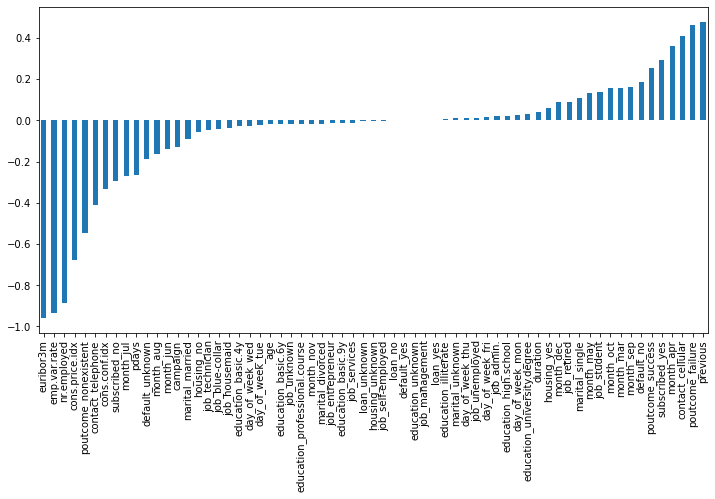

In [41]:
plt.figure(figsize= (12,6))
X.corr()["Cluster"].iloc[:-1].sort_values().plot(kind = "bar")
plt.xticks(rotation = 90);

#### <span style = "color:#b31105;font-family:helvetica"> Once we understand which features are highly considered as a part of clusters.we can then put our domain knowledge or take information from domain specific person to undertand what these clusters represent

#  <span style = "color:#b31105;font-family:helvetica"> K-Means Clustering -Choosing a K value

#### <span style = "color:#b31105;font-family:helvetica"> We will try to answer two things:
* How do we choose a reasonable value for K number of clusters?
* Is there any way we can evaluate how good our current K value us at determining clusters</span>
### <span style = "color:#b31105;font-family:helvetica"> How can we measure "goodness of fit"?

### <span style = "color:#b31105;font-family:helvetica"> We could measure the sum of the distances from points to cluster centers.</span>

#### <span style = "color:#b31105;font-family:helvetica"> And what we can actually do is punish the distances which are really far away by saying the sum of the squarred distances or SSD

### <span style = "color:#b31105;font-family:helvetica"> Imagine K = 2</span>

### <span style = "color:#b31105;font-family:helvetica"> We measure the sum of the squared distances from points to the cluster center: And better the fit for the cluster lower the SSD value will be</span>

### <span style = "color:#b31105;font-family:helvetica"> Then we fit an entirely new Kmeans model with K + 1 or we can say K = 3</span>

### <span style = "color:#b31105;font-family:helvetica"> Then we can measure again the sum of sqaured distances to center SSD</span>

### <span style = "color:#b31105;font-family:helvetica"> In theory SSD would go to zero once K is eqaul to the number of points, so as we increase number for the K lower the SSD.</span>

### <span style = "color:#b31105;font-family:helvetica">Because in that case we  will have a cluster for each point! </span>

### <span style = "color:#b31105;font-family:helvetica">So our goal is to find lower SSD but not on the cluster of every point</span>

### <span style = "color:#b31105;font-family:helvetica"> What we are trying to achive then ?
    
* We keep track of this SSD value for a range of different K values.
* We then look for a K value where rate if reduction in SSD begin to decline.
* This signifies that adding an extra cluster is not ontained enough clarity of cluster separation to justify increasing K.

#### <span style = "color:#b31105;font-family:helvetica"> We can visualize this further by checking this out as en elbow method, since we will track where decrease in SSD begins to flatten out compared to increase in K values

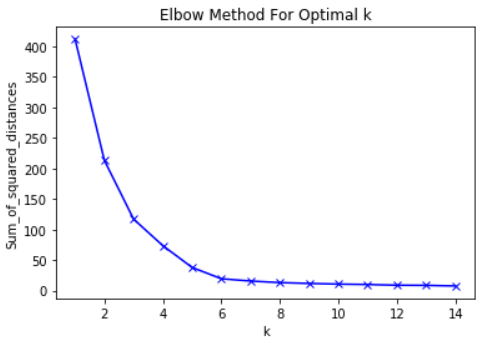

### <span style = "color:#b31105;font-family:helvetica"> These points are strong indicators that incrasing K further is no longer justified as it is not revealing more "signal".</span>
### <span style = "color:#b31105;font-family:helvetica"> We can also mease out this SSD in a bar plot

In [43]:
ssd =[]
for k in range(2,10):
    model = KMeans(n_clusters= k)
    model.fit(scaled_X)
    
    
    ssd.append(model.inertia_)

### Inertia is SSS points assiged to cluster center



In [44]:
ssd

[2469792.4493681416,
 2370416.6301441425,
 2271503.2866552514,
 2234702.1795282406,
 2141338.8626267575,
 2081016.8746797268,
 2029347.7047736393,
 2014260.2555518113]

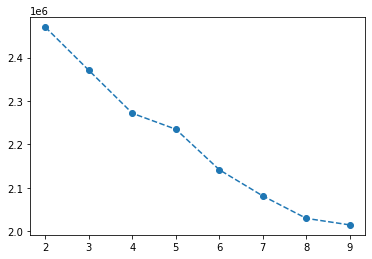

In [48]:
plt.plot(range(2,10),ssd,'o--');

#### <span style = "color:#b31105;font-family:helvetica"> By creating the above elbow plot we can see 6 is good k value from where the decrease in SSD is quite low after that

In [88]:
pd.Series(ssd).diff() # with this we can check the differenc frm previous point to next point

0             NaN
1   -99375.819224
2   -98913.343489
3   -36801.107127
4   -93363.316901
5   -60321.987947
6   -51669.169906
7   -15087.449222
dtype: float64

# <span style = "color:#b31105;font-family:helvetica"> K-Means Clustering Color Quantization 

### <span style = "color:#b31105;font-family:helvetica"> Unsupervised Learning provided opportunities for very creative use cases on algorith applications.</span>

### <span style = "color:#b31105;font-family:helvetica"> Searching for insights, pattern and general understanding of our data allows us to apply methods to a variety of task.

## <span style = "color:#b31105;font-family:helvetica"> One interesting application of clustering in on image quantization</span>

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#### <span style = "color:#b31105;font-family:helvetica"> With matplotlib.image we can directly read in jpeg png file and convert them to numpy array

In [55]:
image_as_array = mpimg.imread('palm_trees.jpg')

In [58]:
image_as_array.shape#(height, width, color)

(1401, 934, 3)

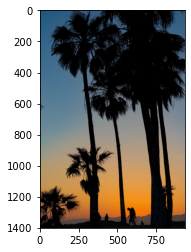

In [63]:
#plt.figure(dpi = 200)
plt.imshow(image_as_array) ### imshow requires array

### <span style = "color:#b31105;font-family:helvetica"> Currently the image is in 3D (which is H,W,C) and we want it convert to 2D (which H * W,C)

In [64]:
(h,w,c) = image_as_array.shape

In [67]:
print(h,w,c)

1401 934 3


In [68]:
image_as_2Darray = image_as_array.reshape(h*w,c) # this is flattening of an image

In [69]:
image_as_2Darray

array([[ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       ...,
       [  9,   9,  11],
       [ 10,  10,  12],
       [ 10,  10,  12]], dtype=uint8)

In [70]:
len(image_as_2Darray.shape)

2

In [71]:
len(image_as_array.shape)

3

In [72]:
from sklearn.cluster import KMeans

In [73]:
model = KMeans(n_clusters=6)

#### <span style = "color:#b31105;font-family:helvetica"> This essentially means we are quantize this down to 6 averaged out colors

In [77]:
labels = model.fit_predict(image_as_2Darray)

In [78]:
labels

array([3, 3, 3, ..., 0, 0, 0])

### <span style = "color:#b31105;font-family:helvetica"> We have stored the clusters in Labels

In [81]:
rgb_codes = model.cluster_centers_.round(0).astype(int)

In [82]:
rgb_codes

array([[  3,   3,   4],
       [191, 155, 110],
       [219, 136,  47],
       [ 71, 109, 138],
       [136, 144, 144],
       [ 67,  62,  62]])

In [83]:
rgb_codes[labels]

array([[ 71, 109, 138],
       [ 71, 109, 138],
       [ 71, 109, 138],
       ...,
       [  3,   3,   4],
       [  3,   3,   4],
       [  3,   3,   4]])

In [84]:
quantized_image = np.reshape(rgb_codes[labels],(h,w,c))

In [86]:
quantized_image ## now we have coverted back to 3d array after quantization

array([[[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 67,  62,  62],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       [[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 67,  62,  62],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       [[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       ...,

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]]

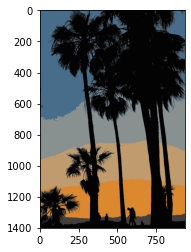

In [87]:
plt.imshow(quantized_image)

### <span style = "color:#b31105;font-family:helvetica"> Thank you!